# Poverty Estimates Data
District level data on the size of the population, the size of the school age population, and the size of the school age population that is in poverty.

Codebook, Districts SAIPE, 1995–2018 15.5 KB
Districts SAIPE, 1995–2018 24.9 MB


In [31]:
import pandas as pd

poverty_estimates = pd.read_csv('poverty_estimates/districts_saipe.csv.zip')
print(poverty_estimates.columns)
poverty_estimates.head()

Index(['leaid', 'year', 'fips', 'district_id', 'district_name',
       'est_population_total', 'est_population_5_17',
       'est_population_5_17_poverty', 'est_population_5_17_poverty_pct',
       'est_population_5_17_pct'],
      dtype='object')


,leaid,year,fips,district_id,district_name,est_population_total,est_population_5_17,est_population_5_17_poverty,est_population_5_17_poverty_pct,est_population_5_17_pct
0,100005,1995,1,5,ALBERTVILLE CITY SCH DIST,16294,2779,506,0.182080,0.170554
1,100030,1995,1,30,ALEXANDER CITY CITY SCH DIST,17704,3258,850,0.260896,0.184026
2,100060,1995,1,60,ANDALUSIA CITY SCH DIST,9602,1706,571,0.334701,0.177671
3,100090,1995,1,90,ANNISTON CITY SCH DIST,27394,4907,2015,0.410638,0.179127
4,100100,1995,1,100,ARAB CITY SCH DIST,7984,1299,223,0.171671,0.162700


In [32]:
# Creates Code dictionaries to help add human readable Columns to dataframe
value_mappings = pd.read_excel(open('poverty_estimates/codebook_districts_saipe (1).xls', 'rb'),
              sheet_name='values')

fips_codes = value_mappings[value_mappings["format"] == "fips"].set_index('code').code_label.to_dict()
poverty_estimates["state_name"] = poverty_estimates["fips"].map(fips_codes)
poverty_estimates

,leaid,year,fips,district_id,district_name,est_population_total,est_population_5_17,est_population_5_17_poverty,est_population_5_17_poverty_pct,est_population_5_17_pct,state_name
0,100005,1995,1,5,ALBERTVILLE CITY SCH DIST,16294,2779,506,0.182080,0.170554,Alabama
1,100030,1995,1,30,ALEXANDER CITY CITY SCH DIST,17704,3258,850,0.260896,0.184026,Alabama
2,100060,1995,1,60,ANDALUSIA CITY SCH DIST,9602,1706,571,0.334701,0.177671,Alabama
3,100090,1995,1,90,ANNISTON CITY SCH DIST,27394,4907,2015,0.410638,0.179127,Alabama
4,100100,1995,1,100,ARAB CITY SCH DIST,7984,1299,223,0.171671,0.162700,Alabama
...,...,...,...,...,...,...,...,...,...,...,...
303144,5606240,2018,56,6240,Washakie County School District 1,7208,1297,183,0.141095,0.179939,Wyoming
303145,5605820,2018,56,5820,Washakie County School District 2,677,90,8,0.088889,0.132939,Wyoming
303146,5604830,2018,56,4830,Weston County School District 1,5497,834,135,0.161871,0.151719,Wyoming
303147,5606090,2018,56,6090,Weston County School District 7,1470,254,15,0.059055,0.172789,Wyoming


### What is the poverty Ratio of children 5 - 17  from 1995 to 2018 in the USA? 



In [76]:
# We can group by year and state and sum all the est_population_5_17 and est_population_5_17_poverty
# Create a new column with the ratios by state.
pov_est_year_df = poverty_estimates.groupby(["year", "state_name"], as_index=False).agg({'est_population_total': ['sum'], 'est_population_5_17': ['sum'] , 'est_population_5_17_poverty': ['sum'] }, as_index=False)

pov_est_year_df.columns = ['_'.join(tup).rstrip('_') for tup in pov_est_year_df.columns.values]
pov_est_year_df["ratio"] = pov_est_year_df["est_population_5_17_poverty_sum"] / pov_est_year_df["est_population_5_17_sum"]

pov_est_year_df

,year,state_name,est_population_total_sum,est_population_5_17_sum,est_population_5_17_poverty_sum,ratio
0,1995,Alabama,4287178,780999,187857,0.240534
1,1995,Alaska,604966,136196,15234,0.111854
2,1995,Arizona,5981745,862347,187117,0.216986
3,1995,Arkansas,2506293,482590,119221,0.247044
4,1995,California,41303549,6156066,1363660,0.221515
...,...,...,...,...,...,...
1133,2018,Virginia,8517685,1358868,169939,0.125059
1134,2018,Washington,7535591,1200584,137938,0.114892
1135,2018,West Virginia,1805832,268903,56706,0.210879
1136,2018,Wisconsin,6030331,941721,118597,0.125936


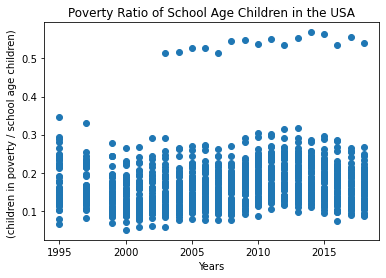

In [78]:
# Scatter Plot of all states in a x= Year and y = Ratio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


x = pov_est_year_df["year"]
y = pov_est_year_df["ratio"]

# Plot
plt.scatter(x, y)
plt.title('Poverty Ratio of School Age Children in the USA')
plt.xlabel('Years')
plt.ylabel('(children in poverty / school age children) ')
plt.show()

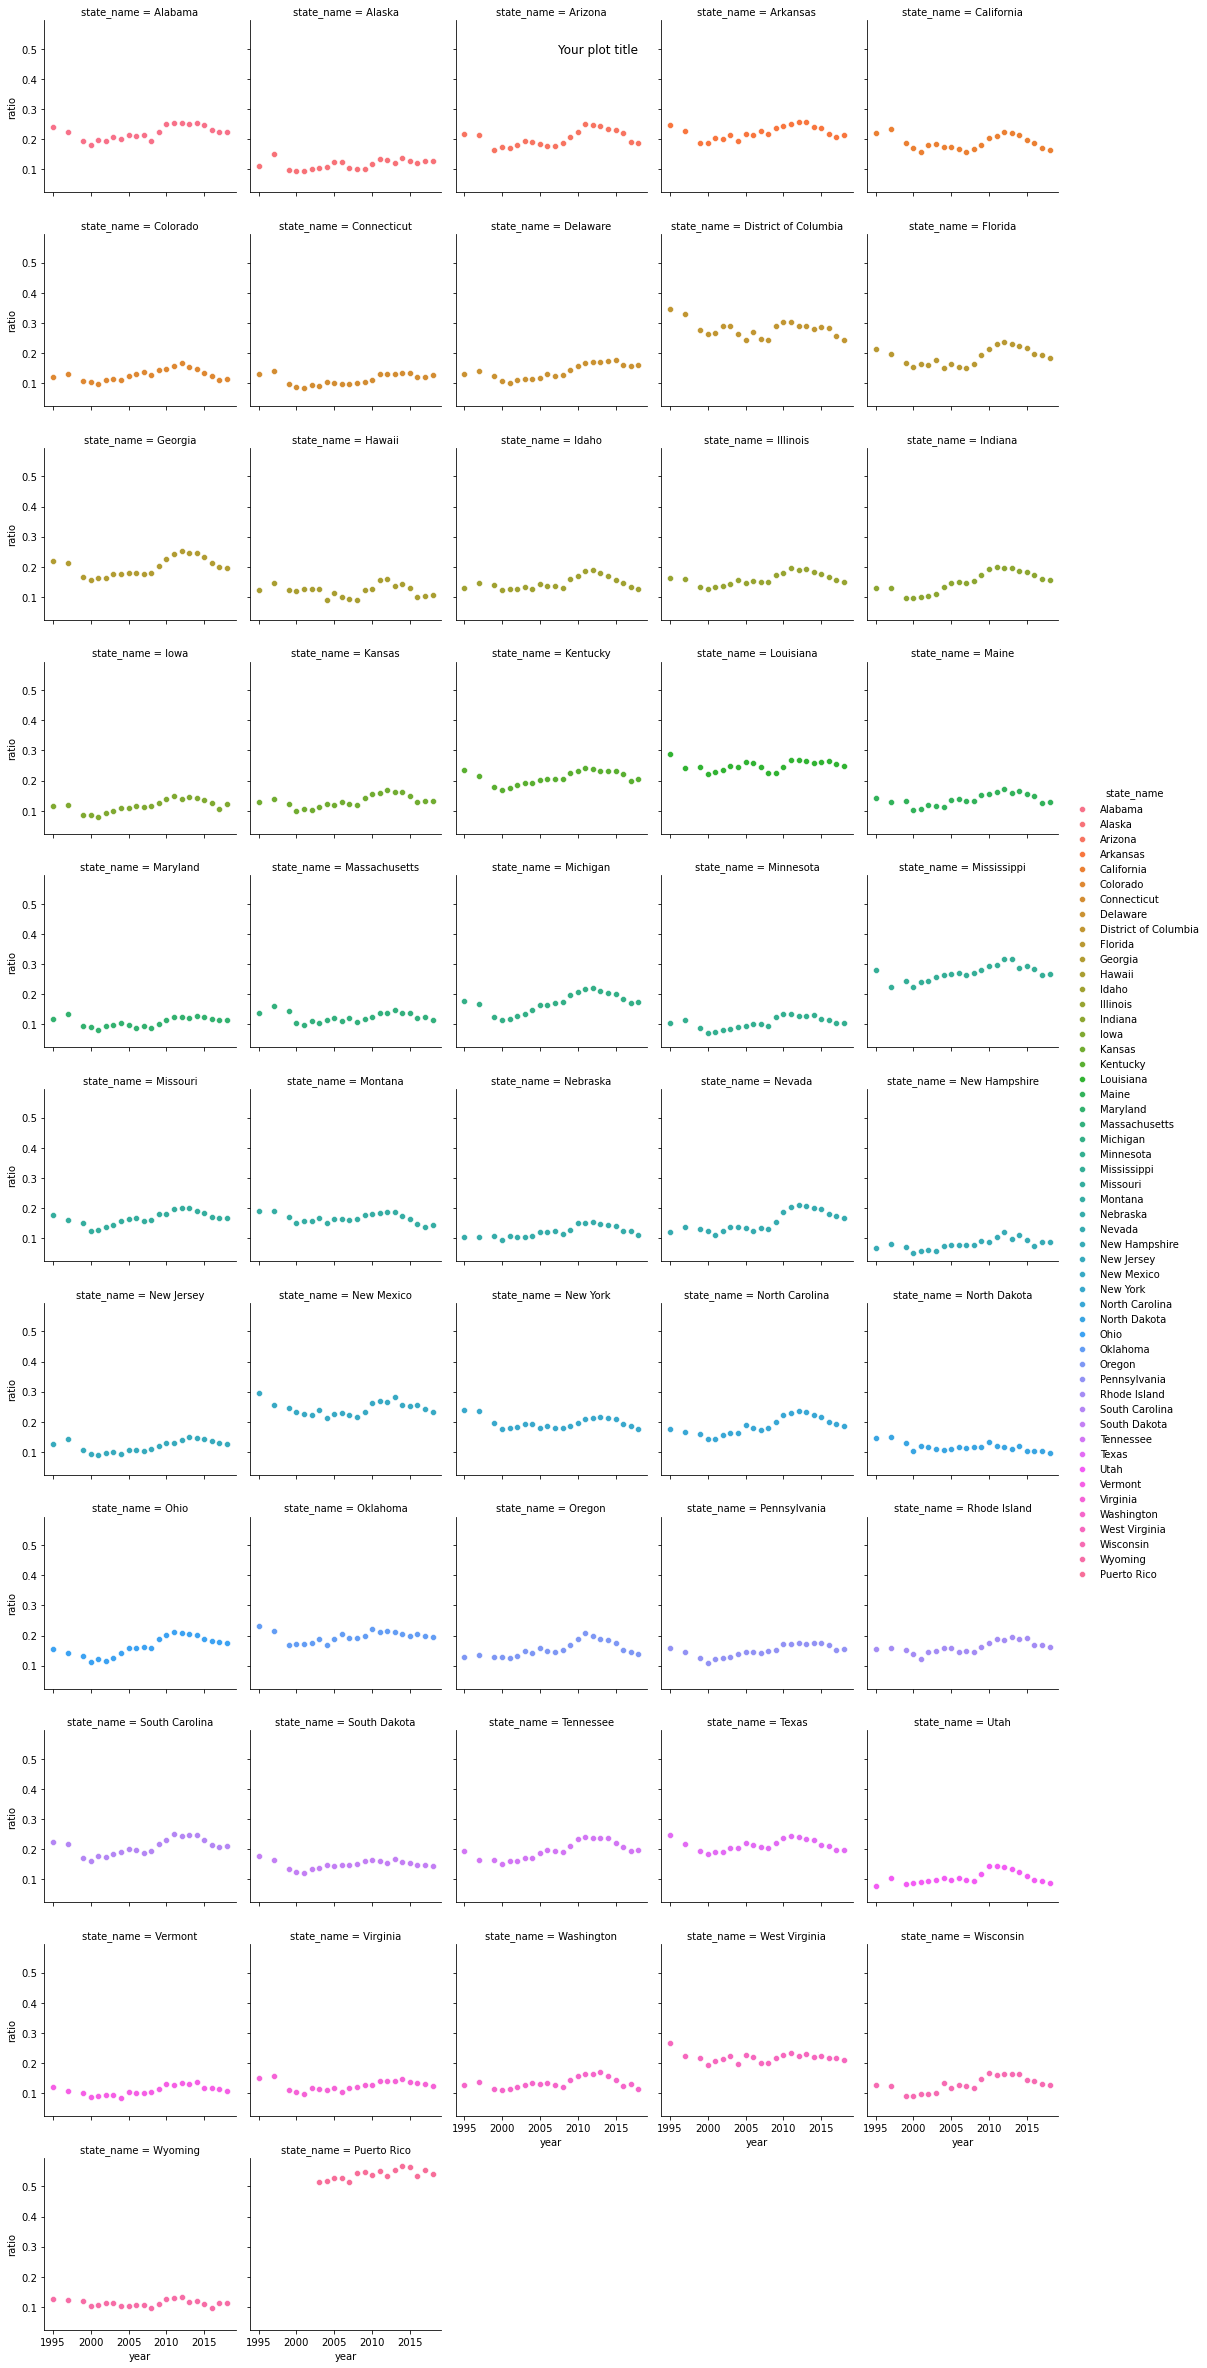

In [82]:
#sns.scatterplot(data = pov_est_year_df, x = "year", y = "ratio")
grid = sns.FacetGrid(pov_est_year_df, col = "state_name", hue = "state_name", col_wrap=5)
grid.map(sns.scatterplot, "year", "ratio")

grid.fig.suptitle("Poverty Ratio of School Age Children from 1995 - 2018")

grid.add_legend()
plt.show()